# Building a House Price Predictor API  
The client is interested in forecasting houses so the company can look to invest. Rather than using a registered valuer they're looking for something which can be done using the latest technology. Jamie has collected some data on existing house prices over the last few years and has asked to see what you can do. 

# 1. Import Data

In [1]:
!pip install pandas scikit-learn xgboost dill

     ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
     - -------------------------------------- 0.3/10.3 MB 10.9 MB/s eta 0:00:01
     ----- ---------------------------------- 1.4/10.3 MB 18.0 MB/s eta 0:00:01
     ----------- ---------------------------- 2.9/10.3 MB 22.9 MB/s eta 0:00:01
     --------------- ------------------------ 4.0/10.3 MB 22.9 MB/s eta 0:00:01
     -------------------- ------------------- 5.2/10.3 MB 23.9 MB/s eta 0:00:01
     -------------------------- ------------- 6.8/10.3 MB 24.2 MB/s eta 0:00:01
     -------------------------------- ------- 8.5/10.3 MB 25.8 MB/s eta 0:00:01
     ------------------------------------- -- 9.6/10.3 MB 25.6 MB/s eta 0:00:01
     --------------------------------------  10.3/10.3 MB 27.3 MB/s eta 0:00:01
     --------------------------------------  10.3/10.3 MB 27.3 MB/s eta 0:00:01
     --------------------------------------- 10.3/10.3 MB 20.4 MB/s eta 0:00:00
     ---------------------------------------- 0.

In [2]:
import pandas as pd

In [3]:
# Load in data 
df = pd.read_csv('regressiondata.csv', index_col = 'ID') 

In [4]:
# Displays the first five rows of data
df.head(7)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
0,2020.12,17.0,467.644775,4.0,5222.0,467104
1,2021.04,36.0,659.924963,3.0,5222.0,547714
2,2019.04,38.0,305.475941,7.0,5213.0,277232
3,2021.10,11.0,607.034754,5.0,5213.0,295958
4,2021.02,14.0,378.827222,5.0,5614.0,439963
5,2020.02,16.0,806.752405,1.0,5212.0,281262
6,2019.01,12.0,561.741678,5.0,5614.0,324167


In [5]:
# Get the last rows of data
df.tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
9351,2019.07,36.0,554.324820,3.0,5217.0,420246
9352,2021.02,21.0,2296.349397,4.0,5614.0,256087
9353,2020.11,18.0,856.174897,0.0,5614.0,257663
9354,2021.10,6.0,87.260667,9.0,5614.0,681072
9355,2020.12,20.0,584.007146,4.0,5614.0,403096


In [6]:
# Get a specific row
df.iloc[9355]

TransactionDate         2020.12
HouseAge                   20.0
DistanceToStation    584.007146
NumberOfPubs                4.0
PostCode                 5614.0
HousePrice               403096
Name: 9355, dtype: object

# 2. Split Data to Prevent Snooping Bias

In [7]:
# Import splitting function
from sklearn.model_selection import train_test_split

In [8]:
# Split data into traininng and testing
train, test = train_test_split(df, test_size=0.3, random_state=1234)

In [9]:
# See the train parition
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286
5758,2020.01,17.0,614.851833,3.0,5213.0,253332
4030,2021.06,34.0,285.892687,9.0,5614.0,486532
8447,2020.12,0.0,195.213314,6.0,5222.0,595168
4370,2019.03,34.0,124.082230,8.0,5212.0,250495


# 3. Exploratory Data Analysis

## Bird's Eye View

In [10]:
train.iloc[0]['HousePrice']

'460286'

In [11]:
train.dtypes

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [12]:
# Get info about the data
train.info

<bound method DataFrame.info of       TransactionDate  HouseAge  DistanceToStation  NumberOfPubs  PostCode  \
ID                                                                           
8450          2021.02      34.0         460.994365           8.0    5614.0   
5758          2020.01      17.0         614.851833           3.0    5213.0   
4030          2021.06      34.0         285.892687           9.0    5614.0   
8447          2020.12       0.0         195.213314           6.0    5222.0   
4370          2019.03      34.0         124.082230           8.0    5212.0   
...               ...       ...                ...           ...       ...   
664           2020.08      37.0         375.427313           1.0    5217.0   
7540          2020.08      34.0         114.362370           5.0    5212.0   
7221          2020.02      16.0         605.834036           2.0    5217.0   
1318          2020.11      36.0          34.582346           7.0    5217.0   
8915          2019.12      12.0 

In [13]:
#Create summary statistics 
train.describe()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
count,6548.000000,6546.000000,6547.000000,6.547000e+03,6547.000000
mean,2020.072389,17.375344,1091.759504,7.677828e+02,5294.499160
std,0.815922,11.469272,1270.038426,6.179430e+04,158.397718
min,2019.010000,0.000000,23.829424,0.000000e+00,5212.000000
25%,2019.100000,9.000000,268.649033,1.000000e+00,5213.000000
50%,2020.070000,15.000000,545.312168,4.000000e+00,5217.000000
75%,2021.040000,28.000000,1529.343484,6.000000e+00,5222.000000
max,2021.120000,43.000000,6486.256457,4.999999e+06,5614.000000


In [14]:
# Type cast incorrect datatypes to new datatypes
train['PostCode'] = train['PostCode'].astype(str)
train['TransactionDate'] = train['TransactionDate'].astype(str)
#train['HousePrice'] = train['HousePrice'].astype(float)

In [15]:
train[['PostCode', 'TransactionDate']]

,PostCode,TransactionDate
ID,,
8450,5614.0,2021.02
5758,5213.0,2020.01
4030,5614.0,2021.06
8447,5222.0,2020.12
4370,5212.0,2019.03
...,...,...
664,5217.0,2020.08
7540,5212.0,2020.08
7221,5217.0,2020.02


In [16]:
# Type cast incorrrect dataypes to new datatypes
train.describe(include='object')

,TransactionDate,PostCode,HousePrice
count,6549,6549,6544
unique,37,6,6496
top,2019.01,5212.0,290262
freq,212,1338,2


## Analyse Numerical Attributes

### Plot Distributions

In [17]:
# Install dependencies
!pip install matplotlib seaborn

     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     - -------------------------------------- 0.2/7.6 MB 4.8 MB/s eta 0:00:02
     ------ --------------------------------- 1.2/7.6 MB 12.4 MB/s eta 0:00:01
     ----------- ---------------------------- 2.2/7.6 MB 17.6 MB/s eta 0:00:01
     ---------------- ----------------------- 3.2/7.6 MB 17.0 MB/s eta 0:00:01
     ---------------------- ----------------- 4.2/7.6 MB 17.9 MB/s eta 0:00:01
     ------------------------------ --------- 5.9/7.6 MB 22.1 MB/s eta 0:00:01
     ------------------------------------- -- 7.2/7.6 MB 22.9 MB/s eta 0:00:01
     ---------------------------------------  7.6/7.6 MB 21.2 MB/s eta 0:00:01
     ---------------------------------------  7.6/7.6 MB 21.2 MB/s eta 0:00:01
     ---------------------------------------- 7.6/7.6 MB 16.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ------------------------------------- 293.3/293.3 kB 17.7 MB/s

In [18]:
!pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Full Stack Machine Learning\fullstack\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


In [19]:
# Import data viz libs
from matplotlib import pyplot as plt
import seaborn as sns

In [22]:
# Show shape of data
train.shape

(6549, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

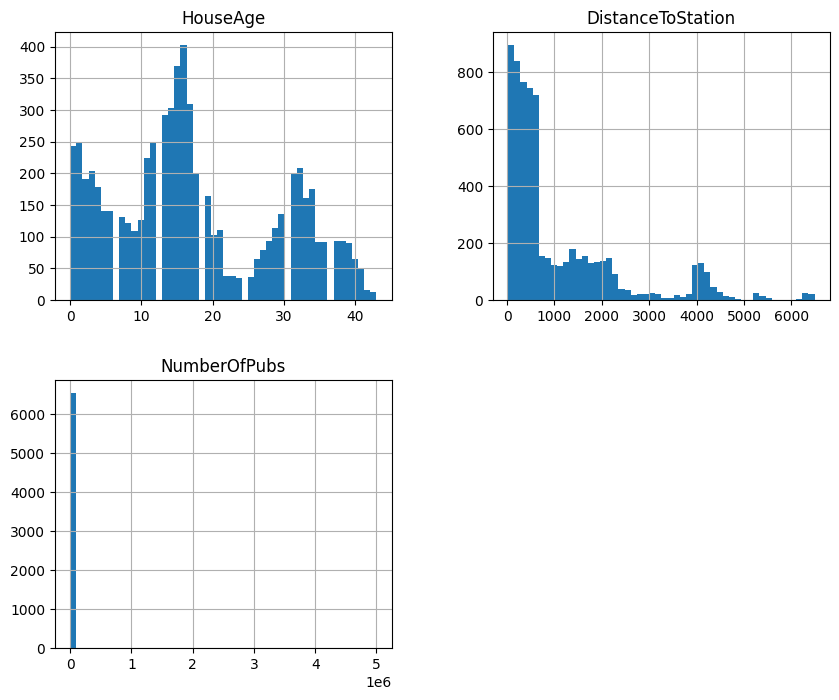

In [21]:
# Plot distributions 
train.hist(figsize=(10,8), bins=50)
plt.show

### Why isn't House Price Showing up as Numeric?

In [ ]:
# str => float
train['HousePrice'].astype(float)

In [ ]:
# Filter dataset based on HousePrice = '??'
train[(train['HousePrice'] == '??']

### Drop Outlier 

### What's happening with pubs

## Analyse Categorical Variables

## Analyse Relationships Numeric/Numeric

### Calculate Pearson's Correlation

## Analyse Relationships Cat/Num

### Is Post Code Driving Value?

### What about the date it was sold?

# 4. Data Preprocessing

## Build Preprocessing Function

## Preview Preprocessed Data

## Clean up Analysis Features

## Create X and y values

# 5. Modelling

## Import ML Dependencies

## Create Pipelines

### Training Outside of a Pipeline

## Create Tuning Grids

## Train Models and Perform HPO

# 6. Evaluate Models

## Import Evaluation Metrics

## Preprocess Test Set For Predictions

### Look for Nulls

### Check datatypes

### Create X_test and y_test 

## Calculate Regression Metrics

## Make Predictions

## Explain model

### Calculate Feature Importance

### Calculate Feature Importance for All Models

### Plot Trees

# 7. Save model